**CLUSTERING ALGORITHMS**

In [1]:
##DATASET: https://www.kaggle.com/shivam2503/diamonds

**KNN CLUSTERING**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline

In [3]:
data=pd.read_csv('diamonds.csv')

In [4]:
data=data[:15000]

In [5]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
data.describe()

,carat,depth,table,price,x,y,z
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000
mean,0.902016,61.832907,57.808560,3878.197933,6.111423,6.111623,3.77674
std,0.258923,1.595973,2.275028,1411.393443,0.706229,0.693808,0.44488
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.00000
25%,0.760000,61.000000,56.000000,3202.500000,5.870000,5.880000,3.62000
50%,1.000000,61.900000,58.000000,4094.500000,6.300000,6.290000,3.89000
75%,1.040000,62.700000,59.000000,4874.250000,6.540000,6.530000,4.04000
max,2.270000,71.800000,70.000000,6041.000000,8.480000,8.390000,5.43000


In [7]:
data['price'].unique()

array([ 326,  327,  334, ..., 6039, 6040, 6041])

In [8]:
data.shape

(15000, 10)

In [9]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [10]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

In [12]:
cut = {'Ideal': 1,'Premium': 2,'Good':3,'Very Good':4,'Fair':5}
data.cut = [cut[item] for item in data.cut]

In [13]:
data['cut'].unique()

array([1, 2, 3, 4, 5])

In [14]:
color = {'E': 1,'I': 2,'J':3,'F':4,'G':5,'D':6,'H':7}
data.color = [color[item] for item in data.color]

In [15]:
data['color'].unique()

array([1, 2, 3, 7, 4, 5, 6])

In [16]:
clarity = {'SI2': 1,'SI1': 2,'VS1':3,'VS2':4,'VVS2':5,'VVS1':6,'I1':7,'IF':8}
data.clarity = [clarity[item] for item in data.clarity]

In [17]:
data['clarity'].unique()

array([1, 2, 3, 4, 5, 6, 7, 8])

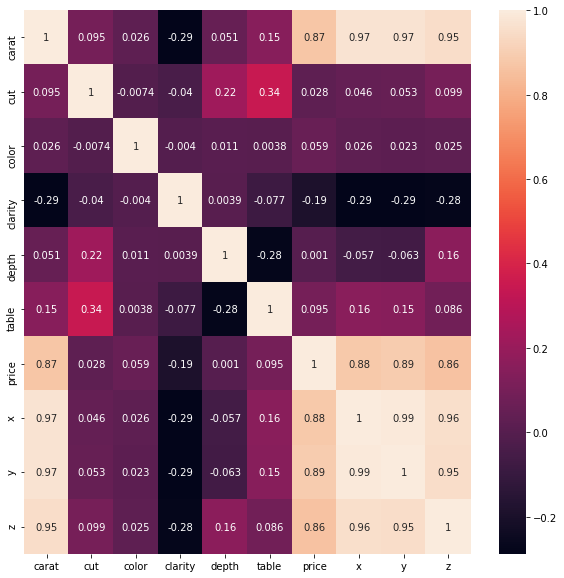

In [18]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [19]:
X=data.drop('price', axis=1)
y=data['price']

In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1)

In [21]:
k_range=range(1,10)
scores={}
scores_list=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,y_train)
  y_pred=knn.predict(X_test)
  scores[k]=metrics.accuracy_score(y_test,y_pred)
  scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0, 0.5, 'Testing Acuuracy')

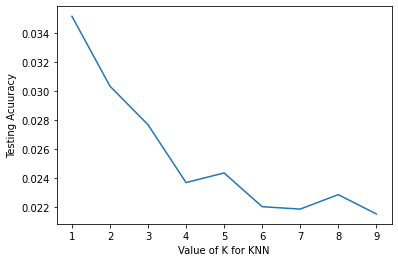

In [22]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Acuuracy')

In [23]:
def print_score(clf, X_train, y_train, X_test, y_test):
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

In [24]:
KNN = KNeighborsClassifier(n_neighbors=2)
KNN.fit(X_train, y_train)
print_score(KNN, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Train Result:
Accuracy Score: 51.98%
_______________________________________________
CLASSIFICATION REPORT:
                326       327       334  ...  accuracy    macro avg  weighted avg
precision  0.666667  0.500000  0.500000  ...  0.519778     0.414008      0.483894
recall     1.000000  1.000000  1.000000  ...  0.519778     0.484838      0.519778
f1-score   0.800000  0.666667  0.666667  ...  0.519778     0.419883      0.470930
support    2.000000  1.000000  1.000000  ...  0.519778  9000.000000   9000.000000

[4 rows x 2786 columns]
_______________________________________________
Confusion Matrix: 
 [[2 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]



**K MEANS CLUSTERING**

In [25]:
kmeanscluster=KMeans(n_clusters=2)
kmeanscluster.fit(data)
y_kmeanscluster=kmeanscluster.predict(data)
print(y_kmeanscluster)

[1 1 1 ... 0 0 0]


In [26]:
kmeanscluster.labels_

array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [27]:
kmeanscluster.cluster_centers_

array([[9.69146993e-01, 2.45553081e+00, 4.19576837e+00, 2.54008909e+00,
        6.18409651e+01, 5.78882183e+01, 4.25516169e+03, 6.31230958e+00,
        6.31042242e+00, 3.90045805e+00],
       [3.11000000e-01, 2.26143791e+00, 4.10588235e+00, 3.27516340e+00,
        6.17619608e+01, 5.71072549e+01, 5.59438562e+02, 4.34283660e+00,
        4.36140523e+00, 2.68753595e+00]])

In [28]:
kms=[]
for i in range(1,10):
  KM=KMeans(n_clusters=i)
  KM.fit(data)
  kms.append(KM.inertia_)

In [29]:
kms

[29878742332.058212,
 11112947382.628323,
 3089209189.5930214,
 1329491094.7238653,
 759120917.4695082,
 483166685.00477093,
 338438452.54804665,
 248136720.00990534,
 189681736.5221062]

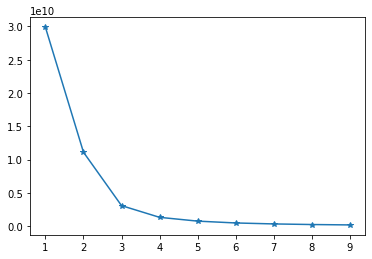

In [30]:
plt.plot(range(1,10),kms,marker='*')

In [31]:
score=silhouette_score(data,KM.labels_,metric='euclidean')

In [32]:
print('Silhouetter Score: %.3f' % score)

Silhouetter Score: 0.593


**KMEDIOD CLUSTERING**

In [33]:
!pip install scikit-learn-extra

     |████████████████████████████████| 1.7MB 4.3MB/s 
     |████████████████████████████████| 22.3MB 1.8MB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [33]:
from sklearn_extra.cluster import KMedoids
kMedoids=KMedoids(n_clusters=3,random_state=0)

In [34]:
kMedoids.fit(data)

KMedoids(n_clusters=3, random_state=0)

In [35]:
y_kmed = kMedoids.fit_predict(data)
y_kmed

array([1, 1, 1, ..., 0, 0, 0])

In [36]:
kMedoids.inertia_

7487724.018334343

In [37]:
silhouette_avg=silhouette_score(data,y_kmed)
print('Silhouetter Score: %.3f' % silhouette_avg)

Silhouetter Score: 0.456


In [38]:
sw=[]
for i in range(2,8):
    kMedoids=KMedoids(n_clusters=i,random_state=0)
    kMedoids.fit(data)
    y_kmed=kMedoids.fit_predict(data)
    silhouette_avg=silhouette_score(data,y_kmed)
    sw.append(silhouette_avg)

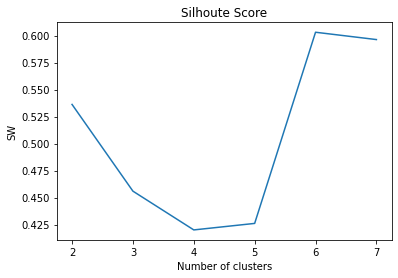

In [39]:
plt.plot(range(2,8),sw)
plt.title('Silhoute Score')
plt.xlabel('Number of clusters')
plt.ylabel('SW')
plt.show()

**KMODE CLUSTERING**

In [49]:
!pip install kmodes

In [40]:
from scipy import stats
from kmodes.kmodes import KModes

In [41]:
kmode=KModes(n_clusters=3,verbose=1,n_init=2)
clusters=kmode.fit_predict(data)
print(kmode)
print(clusters)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 120325.0
KModes(n_clusters=3, verbose=1)
[2 0 2 ... 1 1 0]


In [42]:
print(kmode.cluster_centroids_)

[[  1.01   1.     7.     2.    62.2   57.   596.     6.43   6.37   3.98]
 [  0.9    2.     4.     1.    62.7   58.   561.     6.16   6.09   3.84]
 [  1.     1.     1.     1.    61.9   56.   596.     6.39   6.43   3.97]]


In [43]:
cost=[]
for num_clusters in list(range(1,5)):
    kmode=KModes(n_clusters=num_clusters,verbose=1)
    kmode.fit_predict(data)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 132137.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 129, cost: 123627.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 32, cost: 120325.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 60, cost: 117650.0


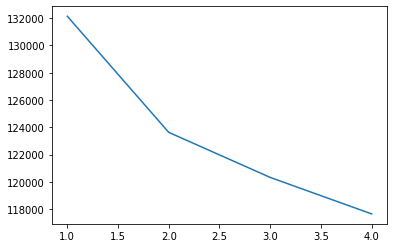

In [44]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [45]:
silhouette_avg=silhouette_score(data,clusters)
print('Silhouetter Score: %.3f' % silhouette_avg)

Silhouetter Score: -0.040


**FROM THESE FOUR ALGORITHMS WE HAVE FOUND KMEANS CLUSTERING IS BEST AMONG THIS FOUR AND LEAST ACCURACY IS KMODE CLUSTERING**